In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [3]:
df = pd.read_csv("C:/data/DSA_features.csv")

In [4]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [5]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [6]:
y=df['activity']
y.value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [7]:
df_F = df[df['activity'].isin(['sitting', 'standing'])]
df_F = df_F.drop('people', axis=1)
df_F.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()

df_F['activity'] = label_encoder.fit_transform(df_F['activity'])

df_F.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,0
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,0
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,0
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,0
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,0


In [10]:
df_F['activity'].value_counts()

activity
0    480
1    480
Name: count, dtype: int64

In [11]:
LABELS = ["Normal", "Abnormal"]

In [12]:
normal = df_F[df_F.activity == 1]
abnormal = df_F[df_F.activity == 0]


In [13]:
normal.shape

(480, 271)

In [14]:
abnormal.shape

(480, 271)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_F, test_size=0.25, random_state=21)

X_train.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
853,8.629970,8.7899,8.4532,0.003402,0.058328,-0.454262,-1.138208,-0.918900,-1.45990,0.006069,...,8.413874e-06,0.002901,-0.113094,-0.291873,-0.289370,-0.295070,1.531545e-06,0.001238,-0.351940,1
818,8.970490,9.0377,8.8888,0.000831,0.028824,-0.383104,0.251871,0.323150,0.18415,0.000654,...,2.859692e-05,0.005348,-1.430813,-0.572946,-0.555980,-0.594240,2.172482e-05,0.004661,0.253950,1
432,7.837118,7.9158,7.7477,0.000946,0.030757,0.140361,-0.138929,0.004876,-0.25011,0.003084,...,1.110522e-04,0.010538,-0.026247,0.373648,0.406920,0.342890,1.054404e-04,0.010268,0.296544,0
23,7.845960,8.0704,7.7122,0.006734,0.082062,0.311689,1.317432,1.418200,1.21120,0.001361,...,8.698413e-07,0.000933,0.407586,-0.056491,-0.054181,-0.058535,7.164530e-07,0.000846,0.208636,0
97,9.625296,9.7031,9.5397,0.000730,0.027010,0.041497,-1.066845,-0.911650,-1.21650,0.004851,...,5.779270e-07,0.000760,0.154149,0.639557,0.641310,0.637330,6.460357e-07,0.000804,-0.184050,0


In [16]:
X_train, X_valid = train_test_split(X_train, test_size=0.25, random_state=21)

X_valid.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
938,9.708287,9.8286,9.5933,0.003366,0.058021,0.055167,-0.929529,-0.758260,-1.053900,0.004162,...,9.176902e-05,0.009580,0.248846,0.044960,0.074658,0.008334,9.989046e-05,0.009995,-0.326918,1
266,6.973882,7.0413,6.8771,0.001130,0.033622,-0.374500,-0.415361,-0.341800,-0.490290,0.000595,...,5.567413e-07,0.000746,-0.281143,0.288966,0.290920,0.287000,6.445057e-07,0.000803,0.005432,0
766,8.985652,9.1080,8.8844,0.001457,0.038171,-0.196937,0.126643,0.202510,0.055042,0.000606,...,3.723081e-06,0.001930,0.410211,0.254632,0.256460,0.252310,6.743926e-07,0.000821,-0.297160,1
591,9.524370,9.6664,9.3390,0.002033,0.045088,-0.065271,-0.023020,0.090622,-0.214960,0.003637,...,5.640075e-06,0.002375,0.243339,-0.002758,0.002089,-0.014335,1.157747e-05,0.003403,-1.114101,1
144,8.892325,8.9736,8.7550,0.001106,0.033262,-0.272485,-1.654110,-1.508500,-1.738500,0.001262,...,1.296282e-05,0.003600,-0.520068,0.491878,0.494060,0.489520,1.036685e-06,0.001018,0.016231,0


In [17]:
X_train = X_train[X_train.activity == 1]
X_valid = X_valid[X_valid.activity == 1]

y_train = X_train['activity']
y_valid = X_valid['activity']

X_train = X_train.drop(['activity'], axis=1)
X_valid = X_valid.drop(['activity'], axis=1)

In [18]:
X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
754,9.095966,9.2583,8.9589,0.001967,0.044346,-0.090263,0.117399,0.246630,-0.005397,0.004153,...,0.222530,2.309957e-05,0.004806,0.354289,0.250422,0.25575,0.246310,5.828126e-06,0.002414,0.399689
710,9.129206,9.2210,9.0120,0.001342,0.036636,0.048126,-2.252798,-2.175200,-2.338000,0.000852,...,0.203760,2.348798e-06,0.001533,-0.882279,0.575230,0.57705,0.573000,7.486104e-07,0.000865,-0.049748
899,8.588831,8.7192,8.4578,0.002326,0.048233,-0.135298,-1.309914,-1.199900,-1.437100,0.002445,...,-0.068324,6.334345e-06,0.002517,-0.053949,-0.302770,-0.29837,-0.305090,1.221131e-06,0.001105,0.804093
781,9.219898,9.3275,9.0958,0.001736,0.041668,-0.257347,-0.044341,0.045994,-0.138350,0.001116,...,0.249450,4.814259e-05,0.006938,0.263179,0.509432,0.52366,0.490810,1.129896e-05,0.003361,-0.137078
780,9.214270,9.3494,9.1036,0.002068,0.045480,-0.247417,0.002966,0.128730,-0.123770,0.002393,...,0.265430,7.300146e-05,0.008544,-0.079460,0.507895,0.52026,0.491060,1.591618e-05,0.003990,-1.801263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,8.973336,9.0632,8.8693,0.001249,0.035342,-0.496734,0.086707,0.143240,-0.004646,0.000728,...,0.239930,3.553761e-06,0.001885,-1.042213,0.255665,0.25765,0.253780,6.767655e-07,0.000823,0.167340
944,9.793642,9.8446,9.7322,0.000489,0.022106,-0.188087,-0.083629,0.057377,-0.183400,0.001994,...,-0.223740,6.176228e-05,0.007859,-0.404298,0.071733,0.10739,0.046871,8.761316e-05,0.009360,0.841584
872,8.754962,8.8857,8.6471,0.002218,0.047095,0.069017,-1.210642,-1.019000,-1.397000,0.002780,...,-0.068141,4.762814e-06,0.002182,-0.088660,-0.300200,-0.29776,-0.303000,1.304870e-06,0.001142,-0.352832
611,9.539718,9.8147,9.3685,0.002254,0.047478,1.798198,-1.005261,-0.861270,-1.106400,0.002505,...,0.805780,7.454727e-07,0.000863,0.314546,0.284255,0.28988,0.281740,3.085854e-06,0.001757,1.485951


In [19]:
y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

In [20]:
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
44,7.821673,8.1005,7.6150,0.008474,0.092057,0.102453,1.464138,1.53480,1.401500,0.000783,...,0.301200,7.720624e-07,0.000879,-0.243314,-0.057050,-0.055184,-0.059168,6.077006e-07,0.000780,-0.240921
16,7.941903,8.1156,7.8093,0.005502,0.074176,-0.103582,1.243725,1.31550,1.093300,0.001341,...,0.299590,6.908694e-07,0.000831,0.096034,-0.056704,-0.054438,-0.058375,5.717767e-07,0.000756,-0.035031
764,9.006567,9.0932,8.9143,0.001241,0.035230,-0.056848,0.075711,0.17293,-0.026968,0.001253,...,0.238060,1.003699e-05,0.003168,-0.276099,0.255680,0.257600,0.253490,7.311578e-07,0.000855,-0.001258
218,9.189202,9.2863,9.1075,0.001118,0.033435,0.049977,-1.559160,-1.51440,-1.625600,0.000407,...,0.436450,4.762399e-07,0.000690,0.378089,0.567469,0.569210,0.565630,4.393903e-07,0.000663,-0.198255
180,9.172114,9.2888,9.0952,0.001016,0.031871,0.613950,-1.538318,-1.41970,-1.640500,0.000679,...,0.437880,1.162096e-06,0.001078,-0.102081,0.568588,0.570270,0.565980,5.886184e-07,0.000767,0.055005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,9.529226,9.7436,9.2723,0.007282,0.085335,-0.319875,0.183168,0.31942,-0.035352,0.005393,...,0.304290,4.203386e-05,0.006483,0.622140,-0.083050,-0.071334,-0.095684,4.284313e-05,0.006545,-0.361181
61,9.649295,10.1710,8.6383,0.028846,0.169843,-2.021061,-0.527739,0.13225,-1.097300,0.067309,...,0.534740,6.048461e-06,0.002459,-0.321234,0.645984,0.648640,0.641030,2.354196e-06,0.001534,-0.884666
166,9.029174,9.0934,8.9882,0.000442,0.021034,0.257276,-1.499974,-1.43730,-1.585700,0.001095,...,0.623220,2.915472e-05,0.005400,-0.148292,0.485639,0.489300,0.481800,3.791472e-06,0.001947,-0.071940
855,8.639959,8.8335,8.4683,0.004202,0.064827,0.510322,-1.161818,-0.98637,-1.415900,0.004417,...,-0.070009,1.013146e-05,0.003183,-0.029533,-0.299736,-0.292930,-0.304120,6.258860e-06,0.002502,0.975743


In [21]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [22]:
from tensorflow.keras.layers import Input, Dense

input_dim = X_train.shape[1]
encoding_dim = 7

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [23]:
history = autoencoder.fit(X_train, X_train, 
                          epochs=20, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5.5759 - val_loss: 5.5579
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.5736 - val_loss: 5.5560
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5.5718 - val_loss: 5.5545
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.5705 - val_loss: 5.5534
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.5695 - val_loss: 5.5526
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.5687 - val_loss: 5.5520
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.5681 - val_loss: 5.5514
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 5.5675 - val_loss: 5.5508
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.5670 - val_loss: 5.5503
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.5664 - val_loss: 5.5497
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.5658 - val_loss: 5.5491
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.5653 - val_loss: 5.5486
Epo

In [59]:
noisy_train = df_n.drop(['activity'], axis=1)

pure_train = df_F.drop(['activity'], axis=1)

In [61]:
input_dim = noisy_train.shape[1]
encoding_dim = 7

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim /2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         1,897 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 270)            │         1,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,013 (11.77 KB)

 Trainable params: 3,013 (11.77 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
autoencoder.fit(noisy_train, pure_train, epochs=30, batch_size=64, shuffle=True, verbose=1)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7098 
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6783 
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6803 
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 4.7037
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6788 
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6810 
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6871 
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6806 
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6791 
Epoch 10/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6815 
Epoch 11/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6674 
Epoch 12/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6755 
Epoch 13/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6731 
Epoch 14/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 4.6867
Epoch 15/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6905 
Ep

In [66]:
pure_X = pure_train
pure_X.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.29968,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.29974,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.30068,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.30088,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.30041,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429


In [70]:
pure_y = df_F['activity']
pure_y

0      0
1      0
2      0
3      0
4      0
      ..
955    1
956    1
957    1
958    1
959    1
Name: activity, Length: 960, dtype: int32

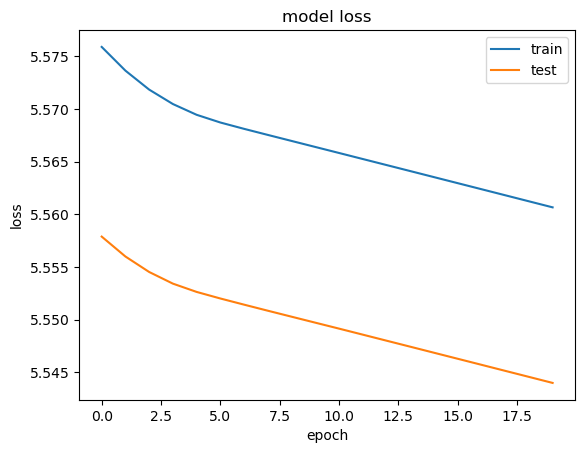

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [84]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,reconstruction_error,true_class
count,240.000000,240.000000
mean,4.713435,0.495833
std,0.631571,0.501028
min,4.388218,0.000000
25%,4.559375,0.000000
50%,4.674307,0.000000
75%,4.728151,1.000000
max,13.926654,1.000000


In [86]:
error_df.head()

,reconstruction_error,true_class
44,4.532044,0
16,4.537180,0
764,4.637637,1
218,4.545378,0
180,4.539354,0


In [92]:
threshold = 20

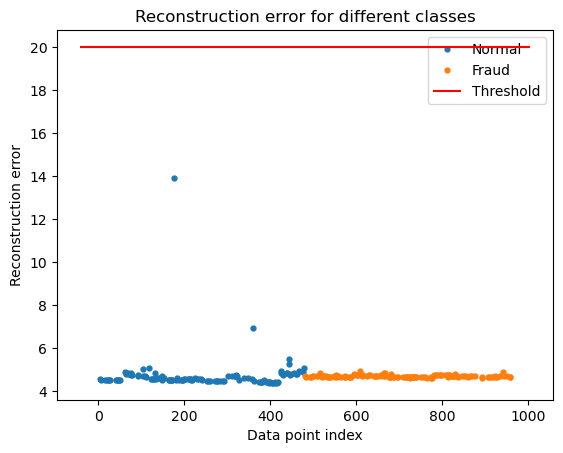

In [94]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

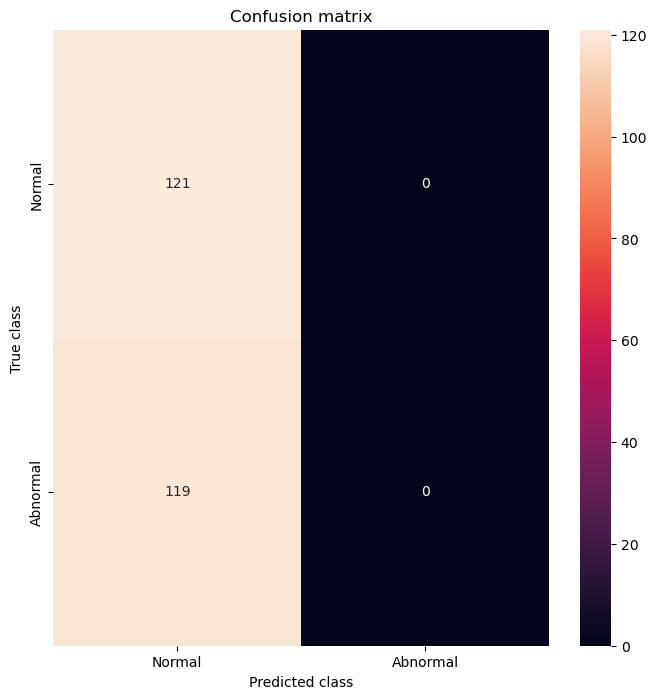

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       121
           1       0.00      0.00      0.00       119

    accuracy                           0.50       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.25      0.50      0.34       240



C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))